In [4]:
import cv2
import os
import classifier
import seaborn as sns
import matplotlib.pyplot as plt
import utils2 as utils
from roads import show_roads

In [5]:
MAINDIR = "trial/"

imgs = os.listdir(MAINDIR)
try:
    imgs.remove("clicked_points.txt")
except:
    print("we're working on a different dataset!")
imgs = sorted(imgs)
imgs = [cv2.imread(MAINDIR + img, 1) for img in imgs]

we're working on a different dataset!


In [6]:
splitter, cossim = classifier.cluster_cv2_images(imgs, 0.1, 2)

<AxesSubplot:>

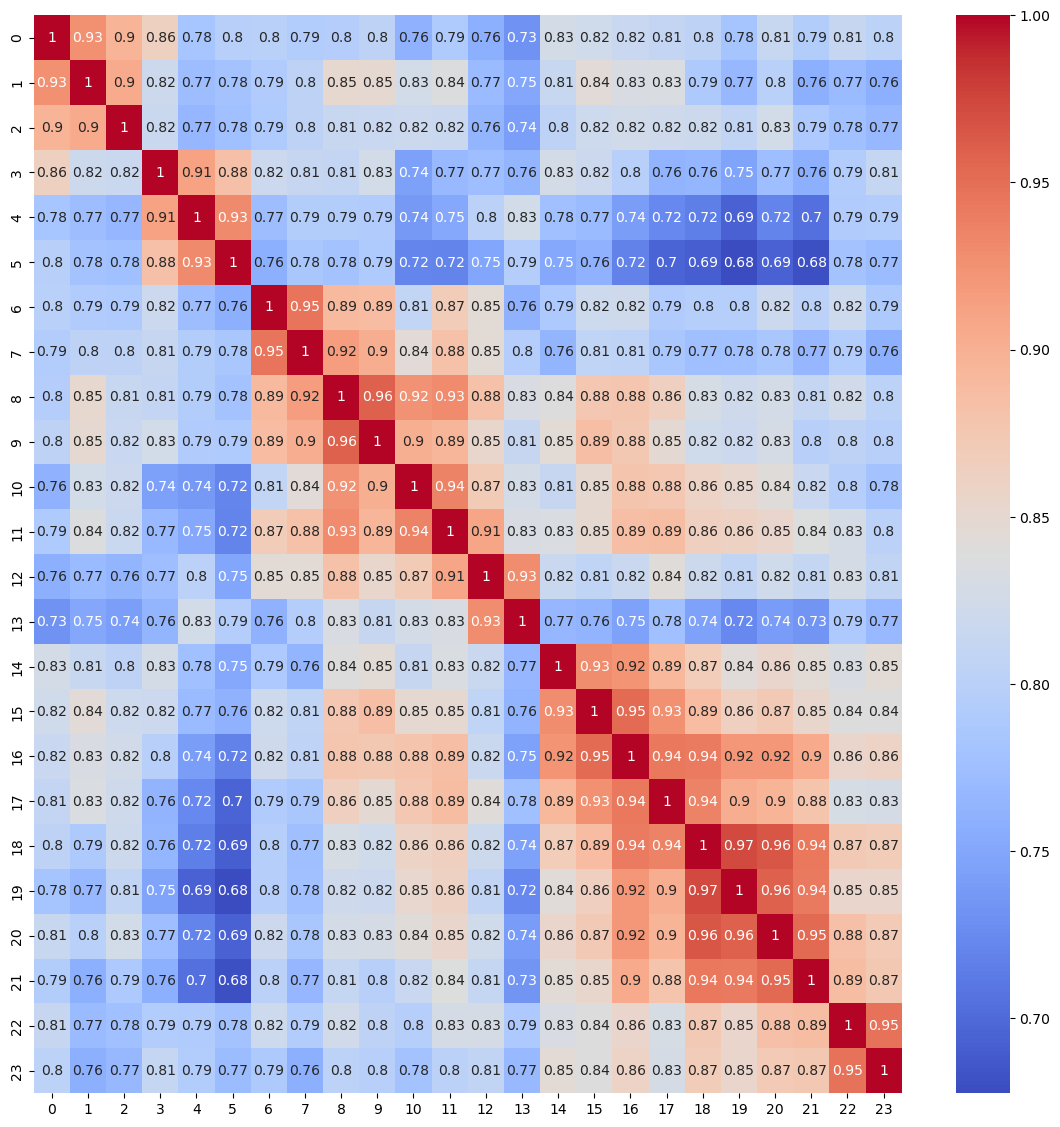

In [7]:
plt.figure(figsize=(14, 14))
sns.heatmap(cossim, annot=True, cmap="coolwarm")

[INFO] Loading input images...
[INFO] Image loading complete. 3 valid images loaded.
[INFO] 3 Images have been loaded
[DEBUG] Stitching images of shape (556, 940, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (783, 1026, 3) and (556, 940, 3)


I0000 00:00:1745140028.606926   21165 service.cc:148] XLA service 0x709f5c005810 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745140028.606996   21165 service.cc:156]   StreamExecutor device (0): Host, Default Version
2025-04-20 14:37:08.630451: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745140028.866662   21165 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


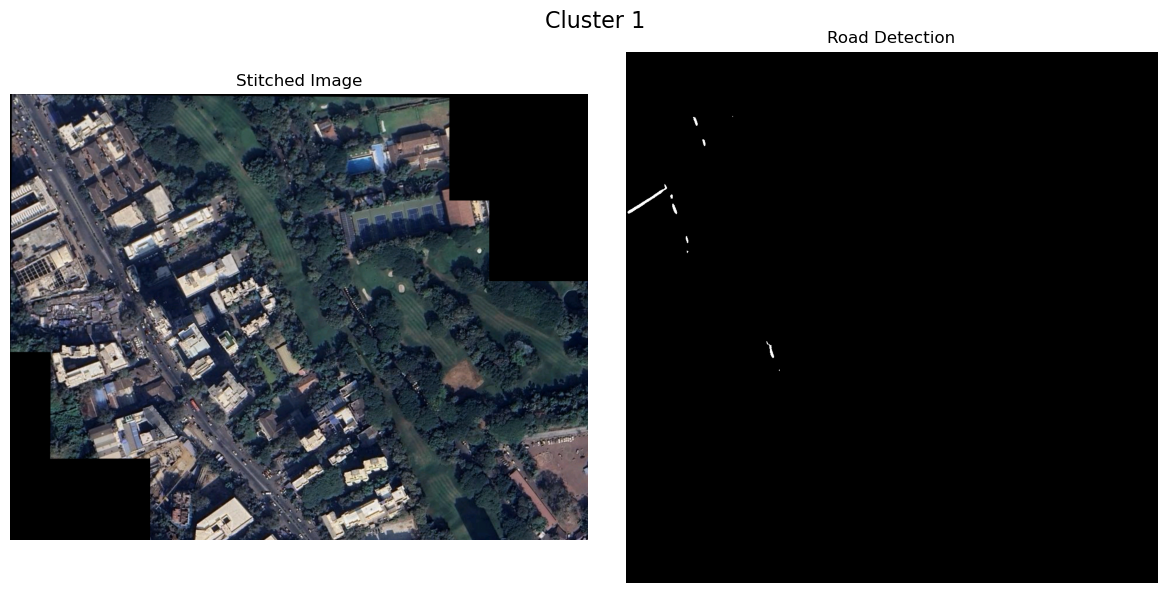

[INFO] Loading input images...
[INFO] Image loading complete. 3 valid images loaded.
[INFO] 3 Images have been loaded
[DEBUG] Stitching images of shape (556, 940, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (689, 1110, 3) and (556, 940, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


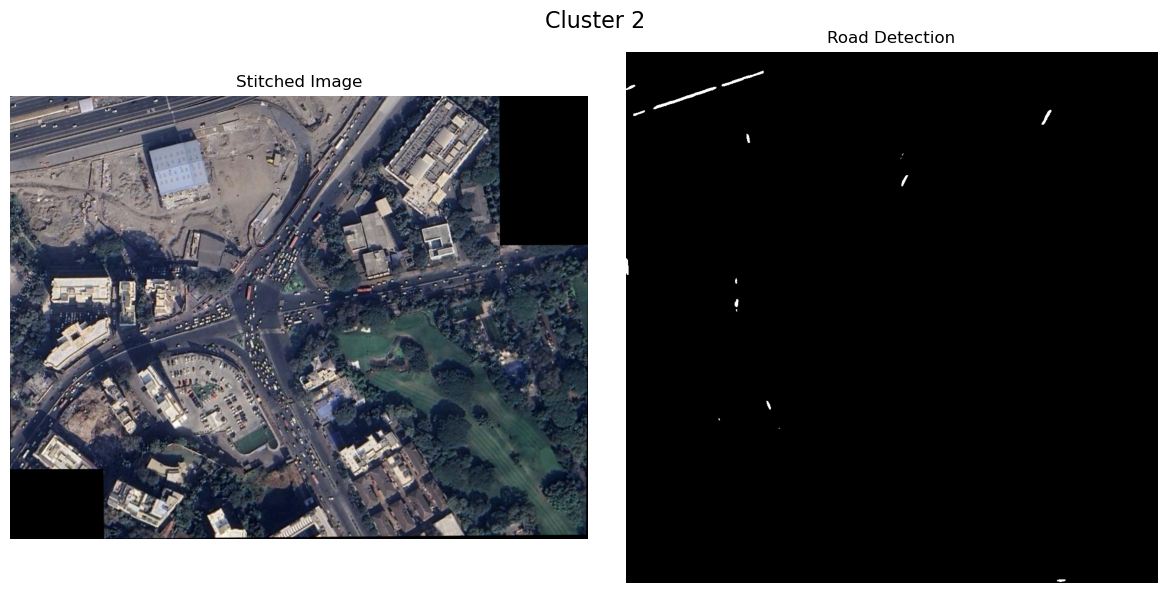

[INFO] Loading input images...
[INFO] Image loading complete. 8 valid images loaded.
[INFO] 8 Images have been loaded
[DEBUG] Stitching images of shape (556, 940, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (780, 1079, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (1001, 1209, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (1192, 1213, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (1190, 1447, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (1189, 1507, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (1188, 1512, 3) and (556, 940, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


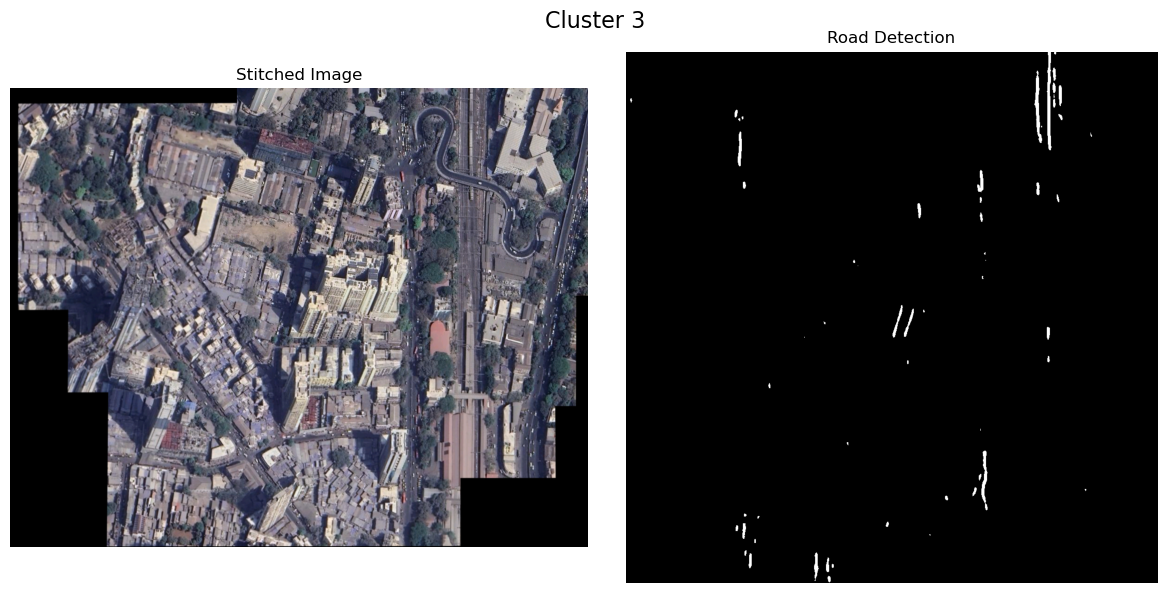

[INFO] Loading input images...
[INFO] Image loading complete. 8 valid images loaded.
[INFO] 8 Images have been loaded
[DEBUG] Stitching images of shape (556, 940, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (677, 976, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (798, 984, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (895, 1008, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (1034, 1018, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (1199, 1053, 3) and (556, 940, 3)
[DEBUG] Stitching images of shape (1328, 1089, 3) and (556, 940, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


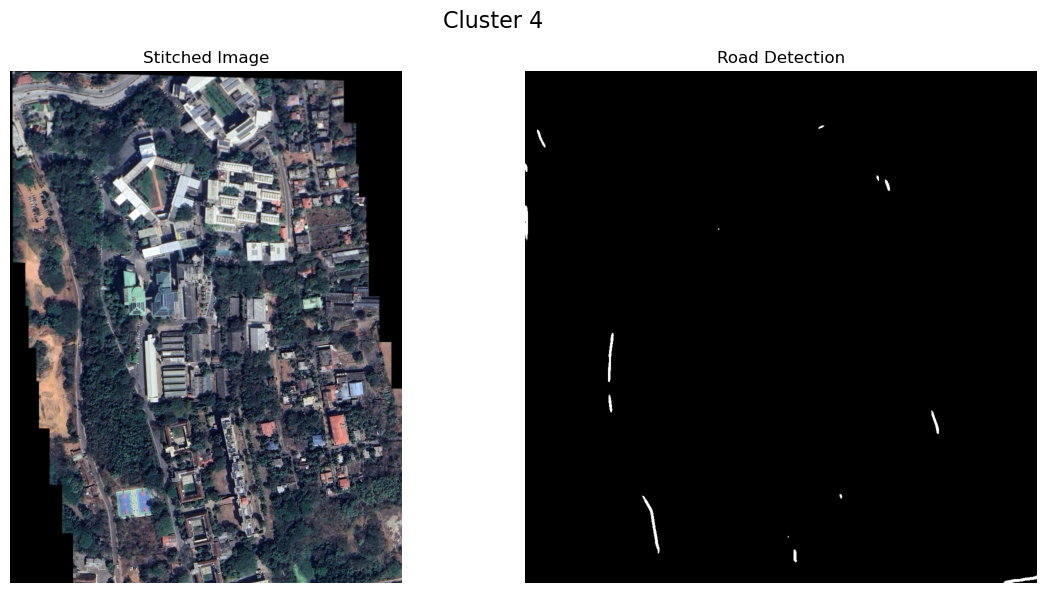

[INFO] Loading input images...
[INFO] Image loading complete. 2 valid images loaded.
[INFO] 2 Images have been loaded
[DEBUG] Stitching images of shape (556, 940, 3) and (556, 940, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


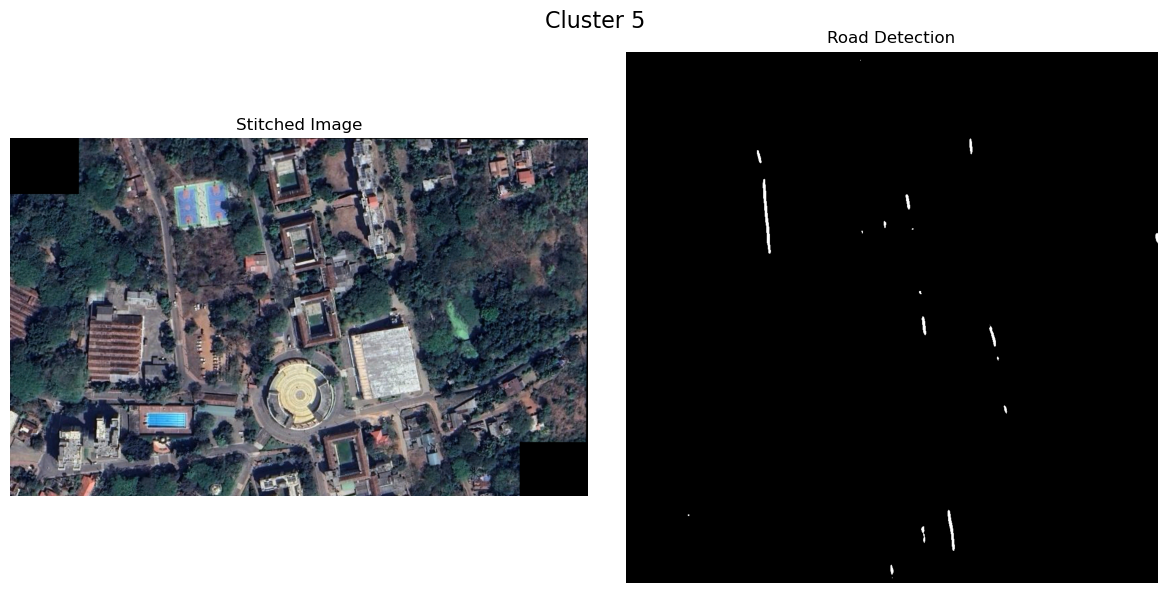

In [8]:
stitcher = utils.Orthomosaic(debug=True)

for cluster_id, idx_list in splitter.items():
    images = [imgs[i] for i in idx_list]
    stitcher.load_images(images)
    
    res = stitcher.mixer()
    res_rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    roads = show_roads(res_rgb)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Cluster {cluster_id + 1}", fontsize=16)

    axs[0].imshow(res_rgb)
    axs[0].set_title("Stitched Image")
    axs[0].axis('off')

    axs[1].imshow(roads)
    axs[1].set_title("Road Detection")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()
